In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(nodes, edges, node_values=None, output_file=None):
    """
    Plot the graph structure of the generated problem.
    
    Args:
        nodes: List of node names
        edges: List of tuples (parent, child) representing edges
        node_values: Optional dictionary of node values
        output_file: Optional path to save the plot
    """
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    # Create layout
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(12, 8))
    
    # Draw nodes
    if node_values:
        node_colors = ['lightblue' if node in node_values else 'lightgray' for node in G.nodes()]
        labels = {node: f'{node}\n{node_values.get(node, "?")}' for node in G.nodes()}
    else:
        node_colors = ['lightblue' for _ in G.nodes()]
        labels = {node: node for node in G.nodes()}
    
    nx.draw(G, pos, 
            with_labels=True,
            labels=labels,
            node_color=node_colors,
            node_size=2000,
            arrowsize=20,
            font_size=8)
    
    if output_file:
        plt.savefig(output_file)
    plt.show()


Output List:
assign V360154 = V269932 + 1
assign V451082 = V065562 + 1
assign V580533 = V065562 + 1
assign V475708 = V451082
assign V411477 = V269932 + 1
assign V065562 = 0
assign V645462 = V405334
assign V405334 = V269932 + 1
assign V537336 = V269932 + 1
assign V368937 = V475708 - 1
assign V598517 = V475708 + 1
Query: (1, ['V451082', 'V475708', 'V580533'])
Node Values: {'V065562': 0, 'V451082': 1, 'V475708': 1, 'V598517': 2, 'V580533': 1, 'V368937': 0}
First, there are such direct assignment(s):
V065562 = 0;

From these direct assignment(s), we have: 
V580533 = V065562 + 1 = 0 + 1 =1;
No other varaibles can be derived from V580533;
V451082 = V065562 + 1 = 0 + 1 =1;
V475708 = V451082 = 1;
V598517 = V475708 + 1 = 1 + 1 =2;
No other varaibles can be derived from V598517;
V368937 = V475708 - 1 = 1 - 1 =0;
No other varaibles can be derived from V368937;
No other varaibles can be derived from V475708;
No other varaibles can be derived from V451082;
No other varaibles can be derived from V06

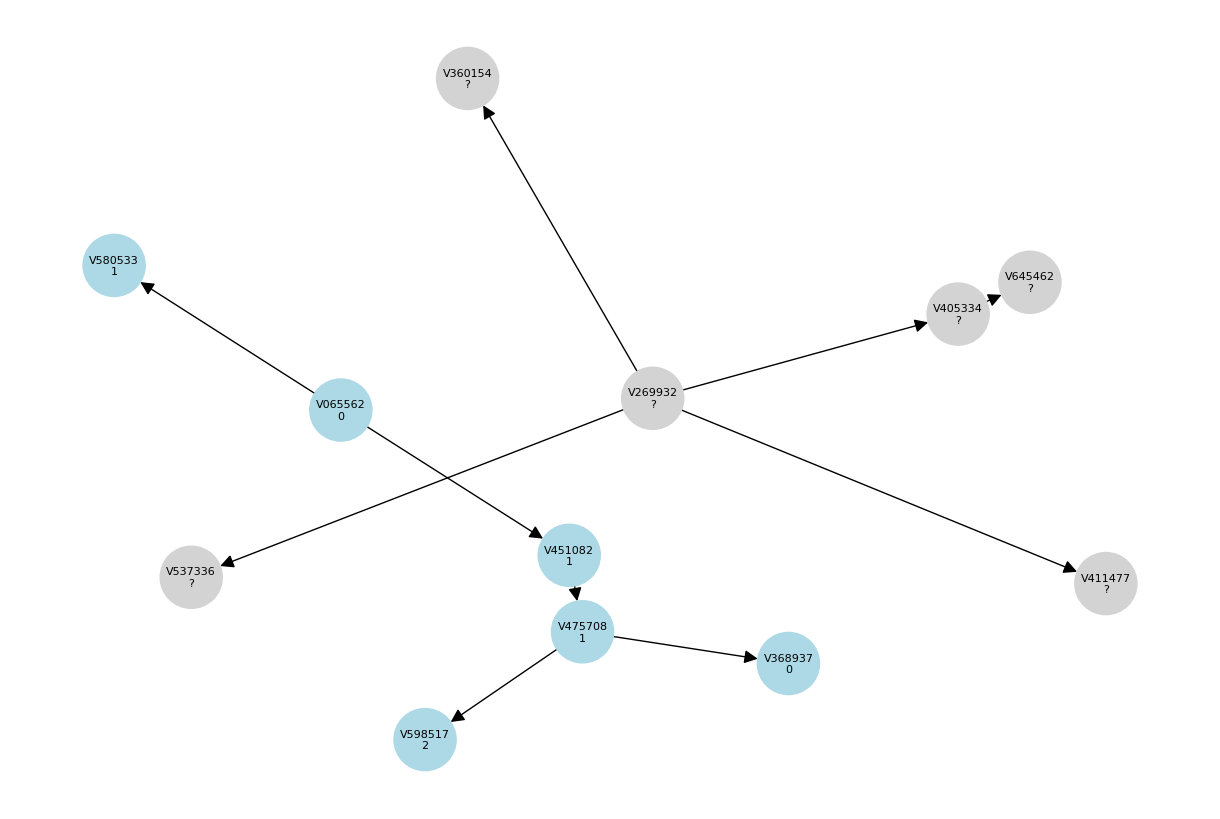

In [4]:
from symbolic.generate_payload import FindGraphGenerator

# Example Usage:   
N = 12  # Total number of nodes
op = 6  # Number of operations in the solution
generator = FindGraphGenerator(47)

output_list, query, node_values, solution = generator.generate_task(op, N, with_solution=True)
print("Output List:")
for line in output_list:
    print(line)
print("Query:", query)
print("Node Values:", node_values)
print(solution)

# Extract edges from output_list
edges = []
for line in output_list:
    parts = line.split(" = ")
    if len(parts) == 2:
        child = parts[0].split(" ")[1]
        parent_expr = parts[1].split(" ")[0]
        if parent_expr.startswith("V"):
            edges.append((parent_expr, child))

# Plot the graph
plot_graph(list(node_values.keys()), edges, node_values)